In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [38]:
stats = pd.read_csv("nbadata.csv", nrows=15716)

In [39]:
stats

,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
0,22401145,4/7/25 19:30,Miami,Heat,1610612748,Philadelphia,76ers,1610612755,1,1,...,11.0,21.0,18.0,54.0,13.0,4.0,1.0,36.0,43.0,NaN
1,22401145,4/7/25 19:30,Philadelphia,76ers,1610612755,Miami,Heat,1610612748,0,0,...,11.0,12.0,16.0,48.0,23.0,4.0,0.0,23.0,56.0,NaN
2,22401144,4/7/25 19:00,Sacramento,Kings,1610612758,Detroit,Pistons,1610612765,0,1,...,5.0,2.0,7.0,58.0,25.0,6.0,1.0,39.0,40.0,NaN
3,22401144,4/7/25 19:00,Detroit,Pistons,1610612765,Sacramento,Kings,1610612758,1,0,...,5.0,14.0,18.0,52.0,13.0,6.0,1.0,43.0,36.0,NaN
4,22401143,4/6/25 20:30,Golden State,Warriors,1610612744,Houston,Rockets,1610612745,1,0,...,8.0,12.0,15.0,40.0,15.0,5.0,0.0,46.0,32.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15711,11900005,10/5/19 9:30,Sacramento,Kings,1610612758,Indiana,Pacers,1610612754,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15712,11900003,10/4/19 9:30,Indiana,Pacers,1610612754,Sacramento,Kings,1610612758,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15713,11900003,10/4/19 9:30,Sacramento,Kings,1610612758,Indiana,Pacers,1610612754,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15714,11900002,10/4/19 1:00,Houston,Rockets,1610612745,Los Angeles,Clippers,1610612746,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df=pd.DataFrame(stats)
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15716 entries, 0 to 15715
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   15716 non-null  int64  
 1   gameDate                 15716 non-null  object 
 2   teamCity                 15716 non-null  object 
 3   teamName                 15716 non-null  object 
 4   teamId                   15716 non-null  int64  
 5   opponentTeamCity         15716 non-null  object 
 6   opponentTeamName         15716 non-null  object 
 7   opponentTeamId           15716 non-null  int64  
 8   home                     15716 non-null  int64  
 9   win                      15716 non-null  int64  
 10  teamScore                15716 non-null  int64  
 11  opponentScore            15716 non-null  int64  
 12  assists                  15712 non-null  float64
 13  blocks                   15712 non-null  float64
 14  steals                

Index(['gameId', 'gameDate', 'teamCity', 'teamName', 'teamId',
       'opponentTeamCity', 'opponentTeamName', 'opponentTeamId', 'home', 'win',
       'teamScore', 'opponentScore', 'assists', 'blocks', 'steals',
       'fieldGoalsAttempted', 'fieldGoalsMade', 'fieldGoalsPercentage',
       'threePointersAttempted', 'threePointersMade',
       'threePointersPercentage', 'freeThrowsAttempted', 'freeThrowsMade',
       'freeThrowsPercentage', 'reboundsDefensive', 'reboundsOffensive',
       'reboundsTotal', 'foulsPersonal', 'turnovers', 'plusMinusPoints',
       'numMinutes', 'q1Points', 'q2Points', 'q3Points', 'q4Points',
       'benchPoints', 'biggestLead', 'biggestScoringRun', 'leadChanges',
       'pointsFastBreak', 'pointsFromTurnovers', 'pointsInThePaint',
       'pointsSecondChance', 'timesTied', 'timeoutsRemaining', 'seasonWins',
       'seasonLosses', 'coachId'],
      dtype='object')

In [41]:
df.isnull().sum()

gameId                         0
gameDate                       0
teamCity                       0
teamName                       0
teamId                         0
opponentTeamCity               0
opponentTeamName               0
opponentTeamId                 0
home                           0
win                            0
teamScore                      0
opponentScore                  0
assists                        4
blocks                         4
steals                         4
fieldGoalsAttempted            4
fieldGoalsMade                 4
fieldGoalsPercentage           4
threePointersAttempted         4
threePointersMade              4
threePointersPercentage        4
freeThrowsAttempted            4
freeThrowsMade                 4
freeThrowsPercentage           5
reboundsDefensive              4
reboundsOffensive              4
reboundsTotal                  4
foulsPersonal                  4
turnovers                      4
plusMinusPoints              100
numMinutes

In [42]:
cols_to_check = [
    'assists',
    'blocks',
    'steals',
    'fieldGoalsAttempted',
    'fieldGoalsMade',
    'fieldGoalsPercentage',
    'threePointersAttempted',
    'threePointersMade',
    'threePointersPercentage',
    'freeThrowsAttempted',
    'freeThrowsMade',
    'freeThrowsPercentage',
    'reboundsDefensive',
    'reboundsOffensive',
    'reboundsTotal',
    'foulsPersonal',
    'turnovers',
    'plusMinusPoints',
    'numMinutes'
]

df = df.dropna(subset=cols_to_check)

print(df[cols_to_check].isnull().sum())

assists                    0
blocks                     0
steals                     0
fieldGoalsAttempted        0
fieldGoalsMade             0
fieldGoalsPercentage       0
threePointersAttempted     0
threePointersMade          0
threePointersPercentage    0
freeThrowsAttempted        0
freeThrowsMade             0
freeThrowsPercentage       0
reboundsDefensive          0
reboundsOffensive          0
reboundsTotal              0
foulsPersonal              0
turnovers                  0
plusMinusPoints            0
numMinutes                 0
dtype: int64


In [43]:
df.isnull().sum()

gameId                         0
gameDate                       0
teamCity                       0
teamName                       0
teamId                         0
opponentTeamCity               0
opponentTeamName               0
opponentTeamId                 0
home                           0
win                            0
teamScore                      0
opponentScore                  0
assists                        0
blocks                         0
steals                         0
fieldGoalsAttempted            0
fieldGoalsMade                 0
fieldGoalsPercentage           0
threePointersAttempted         0
threePointersMade              0
threePointersPercentage        0
freeThrowsAttempted            0
freeThrowsMade                 0
freeThrowsPercentage           0
reboundsDefensive              0
reboundsOffensive              0
reboundsTotal                  0
foulsPersonal                  0
turnovers                      0
plusMinusPoints                0
numMinutes

In [44]:
columns_to_drop = [
    'q1Points', 'q2Points', 'q3Points', 'q4Points', 'benchPoints',
    'biggestLead', 'biggestScoringRun', 'leadChanges', 'pointsFastBreak',
    'pointsFromTurnovers', 'pointsInThePaint', 'pointsSecondChance',
    'timesTied', 'timeoutsRemaining', 'seasonWins', 'seasonLosses', 'coachId'
]

df = df.drop(columns=columns_to_drop)

In [45]:
df.isnull().sum()

gameId                     0
gameDate                   0
teamCity                   0
teamName                   0
teamId                     0
opponentTeamCity           0
opponentTeamName           0
opponentTeamId             0
home                       0
win                        0
teamScore                  0
opponentScore              0
assists                    0
blocks                     0
steals                     0
fieldGoalsAttempted        0
fieldGoalsMade             0
fieldGoalsPercentage       0
threePointersAttempted     0
threePointersMade          0
threePointersPercentage    0
freeThrowsAttempted        0
freeThrowsMade             0
freeThrowsPercentage       0
reboundsDefensive          0
reboundsOffensive          0
reboundsTotal              0
foulsPersonal              0
turnovers                  0
plusMinusPoints            0
numMinutes                 0
dtype: int64

In [46]:
df

,gameId,gameDate,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,freeThrowsAttempted,freeThrowsMade,freeThrowsPercentage,reboundsDefensive,reboundsOffensive,reboundsTotal,foulsPersonal,turnovers,plusMinusPoints,numMinutes
0,22401145,4/7/25 19:30,Miami,Heat,1610612748,Philadelphia,76ers,1610612755,1,1,...,15.0,11.0,0.733,37.0,10.0,47.0,17.0,13.0,12.0,240.0
1,22401145,4/7/25 19:30,Philadelphia,76ers,1610612755,Miami,Heat,1610612748,0,0,...,25.0,17.0,0.680,31.0,14.0,45.0,14.0,13.0,-12.0,240.0
2,22401144,4/7/25 19:00,Sacramento,Kings,1610612758,Detroit,Pistons,1610612765,0,1,...,27.0,22.0,0.815,32.0,18.0,50.0,21.0,10.0,10.0,240.0
3,22401144,4/7/25 19:00,Detroit,Pistons,1610612765,Sacramento,Kings,1610612758,1,0,...,28.0,20.0,0.714,24.0,13.0,37.0,23.0,9.0,-10.0,240.0
4,22401143,4/6/25 20:30,Golden State,Warriors,1610612744,Houston,Rockets,1610612745,1,0,...,11.0,6.0,0.545,31.0,15.0,46.0,14.0,20.0,-10.0,240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15711,11900005,10/5/19 9:30,Sacramento,Kings,1610612758,Indiana,Pacers,1610612754,0,0,...,41.0,32.0,0.780,31.0,4.0,35.0,23.0,19.0,-24.0,240.0
15712,11900003,10/4/19 9:30,Indiana,Pacers,1610612754,Sacramento,Kings,1610612758,0,1,...,33.0,26.0,0.788,33.0,14.0,47.0,29.0,25.0,1.0,265.0
15713,11900003,10/4/19 9:30,Sacramento,Kings,1610612758,Indiana,Pacers,1610612754,1,0,...,36.0,28.0,0.778,24.0,6.0,30.0,31.0,22.0,-1.0,265.0
15714,11900002,10/4/19 1:00,Houston,Rockets,1610612745,Los Angeles,Clippers,1610612746,0,1,...,40.0,32.0,0.800,40.0,12.0,52.0,29.0,20.0,13.0,240.0


In [47]:
df.duplicated().sum()

0

In [48]:
df['gameDate'] = pd.to_datetime(df['gameDate'], format='%m/%d/%y %H:%M')

In [49]:
opponent_df = df.copy()
opponent_df.columns = ['opponent_' + col if col not in ['gameId', 'gameDate', 'teamId', 'opponentTeamId'] else col for col in opponent_df.columns]
df = df.merge(opponent_df, left_on=['gameId', 'opponentTeamId'], right_on=['gameId', 'teamId'], suffixes=('', '_opp'))

In [50]:
df['rebound_diff'] = df['reboundsTotal'] - df['opponent_reboundsTotal']
df['turnover_diff'] = df['turnovers'] - df['opponent_turnovers']
df['freeThrowsMade_diff'] = df['freeThrowsMade'] - df['opponent_freeThrowsMade']
df['fouls_diff'] = df['foulsPersonal'] - df['opponent_foulsPersonal']

In [51]:
df = df.sort_values(['teamId', 'gameDate'])
rolling_stats = ['freeThrowsMade', 'reboundsTotal', 'turnovers', 'plusMinusPoints']
for stat in rolling_stats:
    df[f'{stat}_rolling5'] = df.groupby('teamId')[stat].transform(lambda x: x.shift(1).rolling(5, min_periods=1).mean())
df['rolling_win'] = df.groupby('teamId')['win'].transform(lambda x: x.shift(1).rolling(5, min_periods=1).mean())
df['prev_game_date'] = df.groupby('teamId')['gameDate'].shift(1)
df['days_since_last'] = (df['gameDate'] - df['prev_game_date']).dt.days
df['back_to_back'] = df['days_since_last'].apply(lambda x: 1 if x == 1 else 0)

In [52]:
features = [
    'home',
    'rebound_diff',
    'turnover_diff',
    'freeThrowsMade_diff',
    'fouls_diff',
    'freeThrowsMade_rolling5',
    'reboundsTotal_rolling5',
    'turnovers_rolling5',
    'rolling_win',
    'back_to_back',
    'plusMinusPoints_rolling5'
]
df_model = df.dropna(subset=features + ['win'])

In [53]:
df_model = df_model.sort_values('gameDate')
split_date = pd.to_datetime('2024-10-01')
train_df = df_model[df_model['gameDate'] < split_date]
test_df = df_model[df_model['gameDate'] >= split_date]

X_train = train_df[features]
y_train = train_df['win']
X_test = test_df[features]
y_test = test_df['win']

In [54]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True)
}

In [55]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
results_df

/Users/ethanrosenfeld/anaconda3/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/ethanrosenfeld/anaconda3/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/ethanrosenfeld/anaconda3/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/ethanrosenfeld/anaconda3/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.759095,0.760357,0.756669,0.758509
4,SVM,0.756265,0.754006,0.760711,0.757344
2,XGBoost,0.748585,0.746197,0.753436,0.749799
1,Random Forest,0.740501,0.744856,0.731609,0.738173
3,KNN,0.713420,0.715334,0.708973,0.712140


/Users/ethanrosenfeld/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethanrosenfeld/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ethanrosenfeld/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


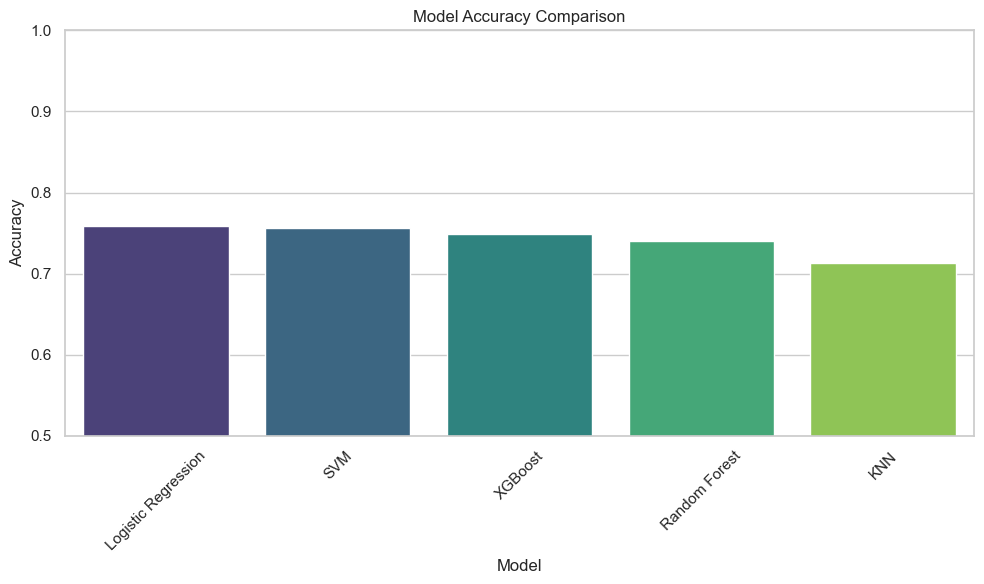

In [56]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()